## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv(
    'QueryResults.csv', 
    names=['DATE', 'PROGRAMMING_LANGUAGE', 'NUMBER_OF_POSTS'], 
    header=0
)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head(), df.tail(), sep='\n\n')

                  DATE PROGRAMMING_LANGUAGE  NUMBER_OF_POSTS
0  2008-07-01 00:00:00                   c#                3
1  2008-08-01 00:00:00             assembly                8
2  2008-08-01 00:00:00                    c               83
3  2008-08-01 00:00:00                   c#              505
4  2008-08-01 00:00:00                  c++              164

                     DATE PROGRAMMING_LANGUAGE  NUMBER_OF_POSTS
2449  2023-04-01 00:00:00                  php             2132
2450  2023-04-01 00:00:00               python            13085
2451  2023-04-01 00:00:00                    r             3176
2452  2023-04-01 00:00:00                 ruby              225
2453  2023-04-01 00:00:00                swift             1149


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2454, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE                    2454
PROGRAMMING_LANGUAGE    2454
NUMBER_OF_POSTS         2454
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
(
    df
    .groupby('PROGRAMMING_LANGUAGE')
    .sum('NUMBER_OF_POSTS')
    .sort_values('NUMBER_OF_POSTS', ascending=False)
)

,NUMBER_OF_POSTS
PROGRAMMING_LANGUAGE,
javascript,2488492
python,2126356
java,1893550
c#,1588527
php,1456715
c++,792355
r,487791
c,395503
swift,326407


**Some** languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby('PROGRAMMING_LANGUAGE').count()

,DATE,NUMBER_OF_POSTS
PROGRAMMING_LANGUAGE,,
assembly,177,177
c,177,177
c#,178,178
c++,177,177
delphi,177,177
go,162,162
java,177,177
javascript,177,177
perl,177,177


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
df.head()

,DATE,PROGRAMMING_LANGUAGE,NUMBER_OF_POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [10]:
reshaped_df = df.pivot(
    index='DATE', 
    columns='PROGRAMMING_LANGUAGE', 
    values='NUMBER_OF_POSTS'
)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
reshaped_df.shape

(178, 14)

In [12]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='PROGRAMMING_LANGUAGE')

In [13]:
reshaped_df.head()

PROGRAMMING_LANGUAGE,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1641.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,536.0,6.0,287.0,NaN
2008-10-01,16.0,302.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,956.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [14]:
reshaped_df.count()

PROGRAMMING_LANGUAGE
assembly      177
c             177
c#            178
c++           177
delphi        177
go            162
java          177
javascript    177
perl          177
php           177
python        177
r             175
ruby          177
swift         169
dtype: int64

In [15]:
reshaped_df.fillna(0, inplace=True)

In [16]:
reshaped_df.count()

PROGRAMMING_LANGUAGE
assembly      178
c             178
c#            178
c++           178
delphi        178
go            178
java          178
javascript    178
perl          178
php           178
python        178
r             178
ruby          178
swift         178
dtype: int64

In [17]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

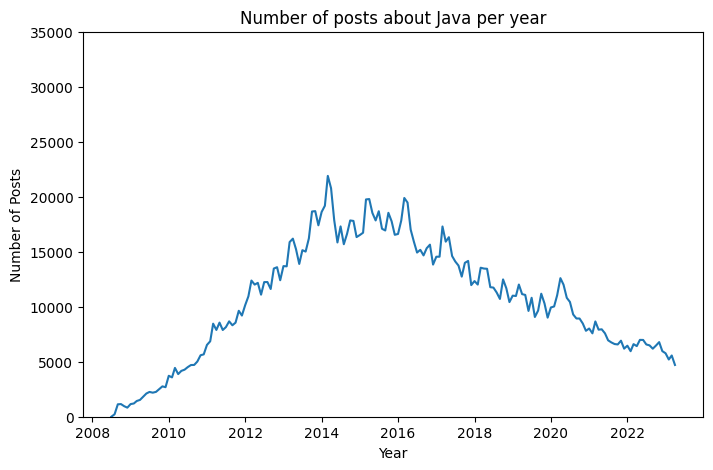

In [18]:
plt.figure(figsize=(8, 5))
plt.title('Number of posts about Java per year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

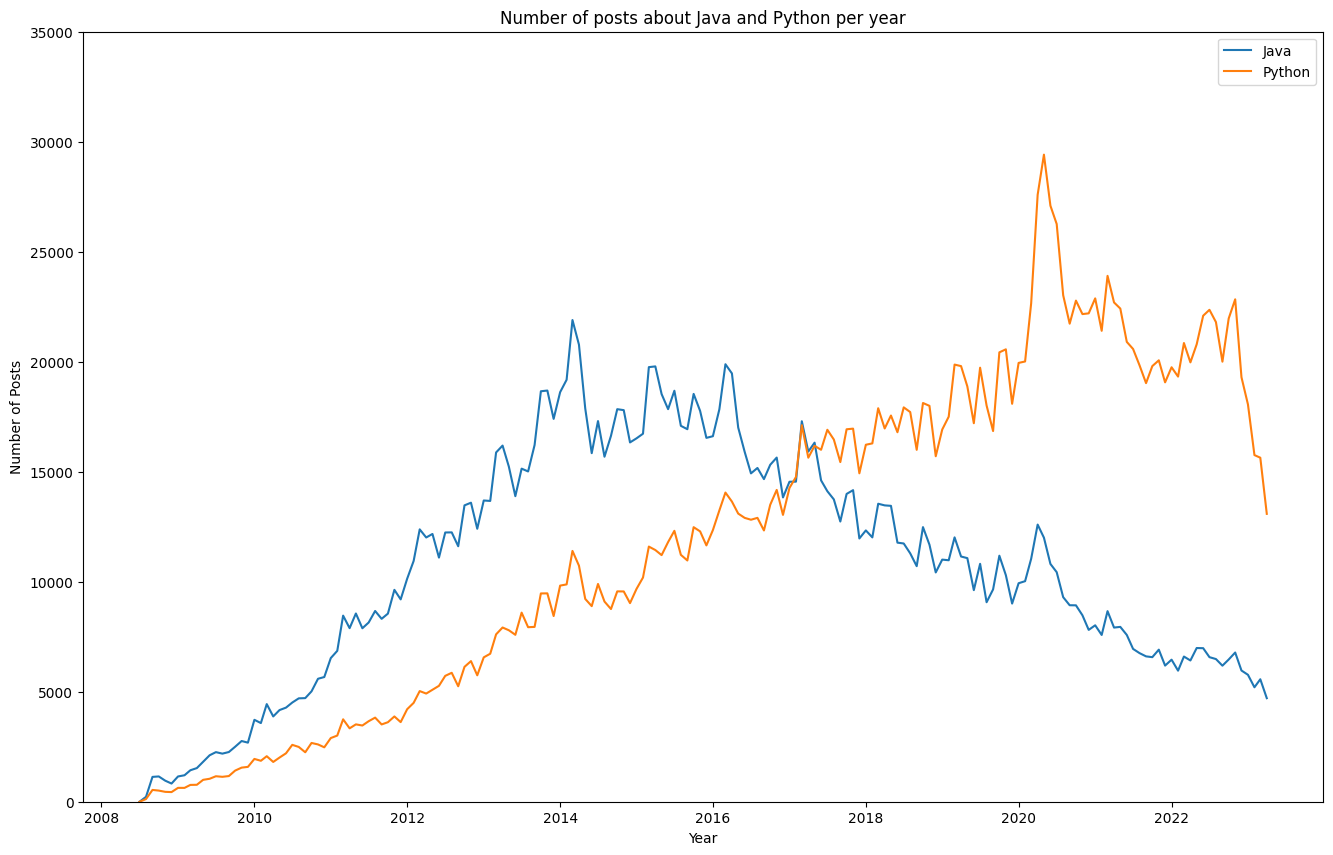

In [19]:
plt.figure(figsize=(16, 10))
plt.title('Number of posts about Java and Python per year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])
plt.legend(['Java', 'Python'])
plt.show()

**Show all languages**

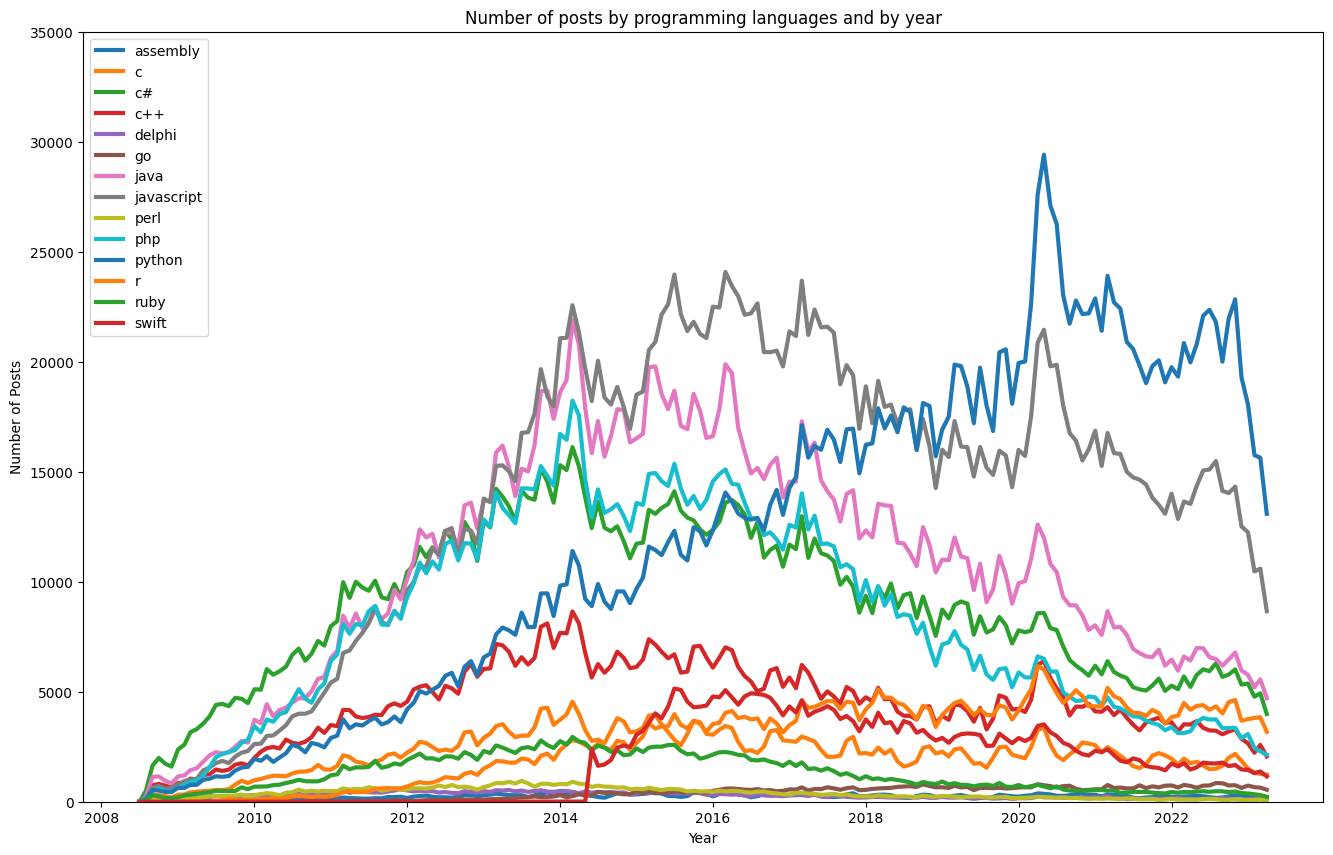

In [20]:
plt.figure(figsize=(16, 10))
plt.title('Number of posts by programming languages and by year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
plt.plot(reshaped_df, linewidth=3)
plt.legend(reshaped_df.columns)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

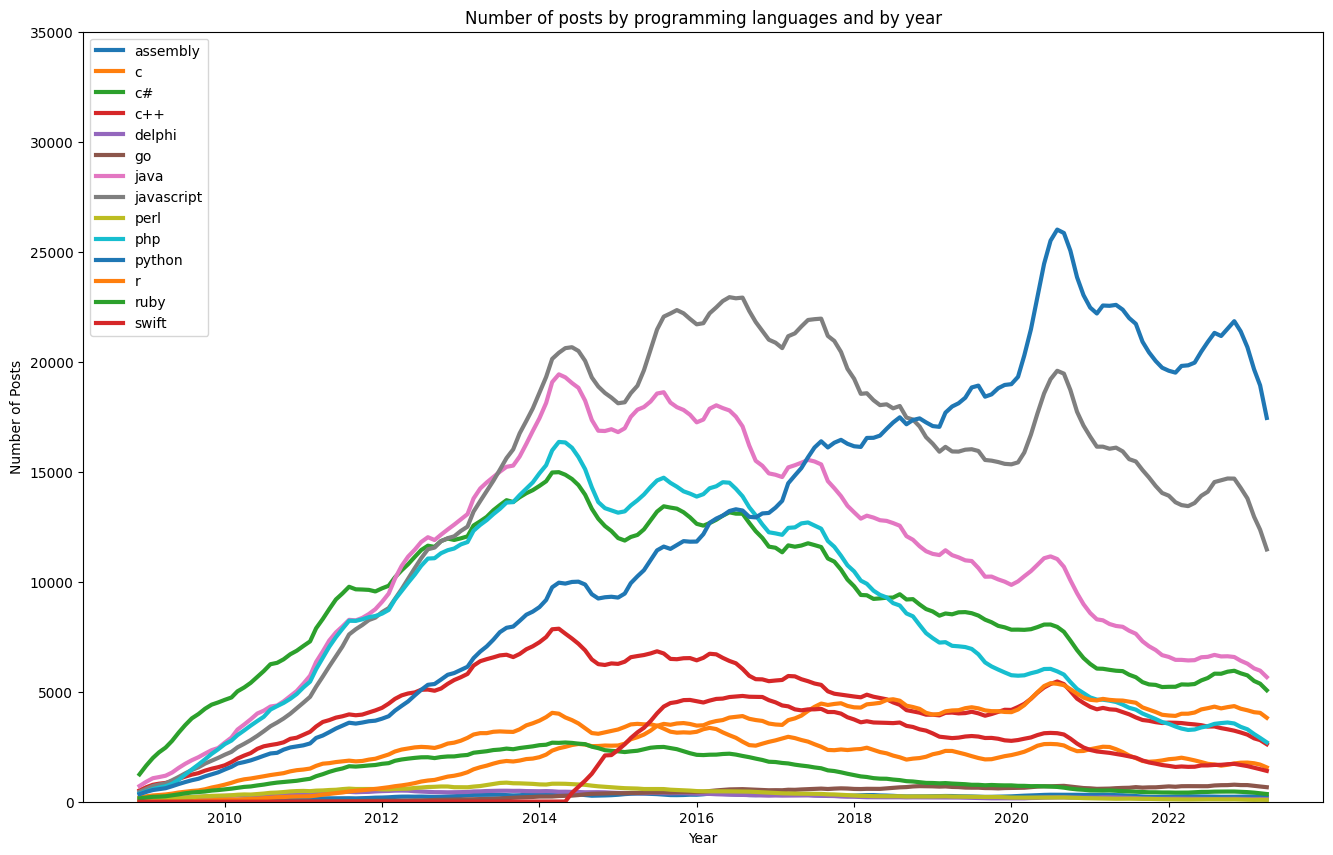

In [21]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16, 10))
plt.title('Number of posts by programming languages and by year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
plt.plot(roll_df, linewidth=3)
plt.legend(roll_df.columns)
plt.show()